In [1]:
%pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 5.6 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894079 sha256=71f1fb39597be8f5e5762e2d873d19a6893a0794044be7e79d31dfbe54c9972a
  Stored in directory: /Users/isaquehg/Library/Caches/pip/wheels/b1/67/d1/6c29aeb1cd2d36447ad5b0de027580b8894aff702a9b50041e
Successfully built scikit-fuzzy
Note: you may need to restart the kernel to use updated packages.


# Lógica Fuzzy

In [2]:
import numpy as np
import skfuzzy as fuzzy
import skfuzzy.control as control

<img src = "images/fuzzy.png">

* Grau de pertinência: o quanto um elemento 'x' pertence a um conjunto 'A'
* Variável: rótulo associado a uma variável linguística
* Conjunto de termos: nomes dados aos valores de cada variável
* Universo de duscurso: domínio em que cada variável é definida

<img src = "images/fluxograma.png">

## Problema da gorjeta
<img src = "images/regras_gorjeta.png">

#### Criando antescedente (entrada/input)

In [3]:
# Definindo universo de discurso e nome da variável
universo = np.arange(0, 11)

qualidade = control.Antecedent(universe = universo, label = "qualidade")
servico = control.Antecedent(universe = universo, label = "servico")

# Criando função de pertinência triangular -> trimf, trapezoidal -> trapmf
qualidade["ruim"] = fuzzy.trapmf(qualidade.universe, [0, 0, 2, 5])
qualidade["bom"] = fuzzy.trimf(qualidade.universe, [3, 5, 7])
qualidade["excelente"] = fuzzy.trapmf(qualidade.universe, [5, 8, 10, 10])

servico["ruim"] = fuzzy.trapmf(servico.universe, [0, 0, 2, 5])
servico["bom"] = fuzzy.trimf(servico.universe, [3, 5, 7])
servico["excelente"] = fuzzy.trapmf(servico.universe, [5, 8, 10, 10])


/opt/anaconda3/lib/python3.11/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


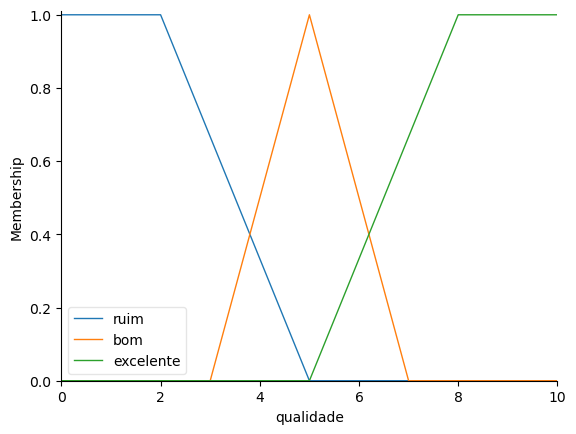

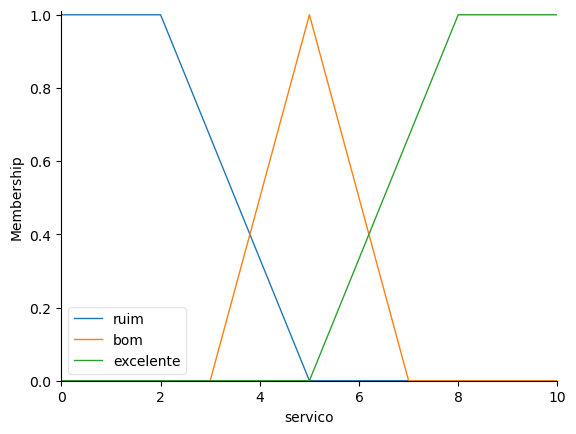

In [4]:
qualidade.view()
servico.view()

#### Criando consequent (saída/output)

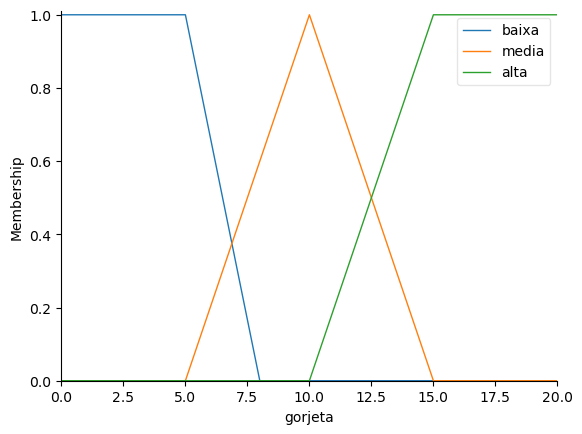

In [5]:
# Universo da gorjeta
universo_gorjeta = np.arange(0, 21)

gorjeta = control.Consequent(universe = universo_gorjeta, label = "gorjeta")

gorjeta["baixa"] = fuzzy.trapmf(gorjeta.universe, [0, 0, 5, 8])
gorjeta["media"] = fuzzy.trimf(gorjeta.universe, [5, 10, 15])
gorjeta["alta"] = fuzzy.trapmf(gorjeta.universe, [10, 15, 20, 20])

gorjeta.view()

#### Criando regras
* SERVICO = ruim ou QUALIDADE = ruim -> GORJETA = baixa
* SERVICO = bom -> GORJETA = media
* SERVICO = excelente ou QUALIDADE = excelente -> GORJETA = alta

In [6]:
# REGRA -> expressão X, resultado Y

regra1 = control.Rule(servico["ruim"] | qualidade["ruim"], gorjeta["baixa"])
regra2 = control.Rule(servico["bom"], gorjeta["media"])
regra3 = control.Rule(servico["excelente"] | qualidade["excelente"], gorjeta["alta"])

#### Criando sistema

In [7]:
# Adicionando regras ao controle
gorjeta_controle = control.ControlSystem([regra1, regra2, regra3])

# Criando sistema com o controle de gorjeta
sistema = control.ControlSystemSimulation(gorjeta_controle)

Resultado 'desfuzzificado': 10.000000000000004


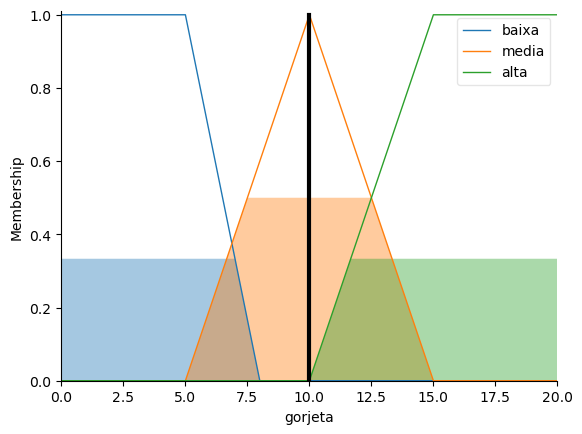

In [8]:
sistema.input["qualidade"] = 4
sistema.input["servico"] = 6

# Executando o sistema
sistema.compute()

print(f"Resultado 'desfuzzificado': {sistema.output['gorjeta']}")

gorjeta.view(sim = sistema)